In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import P201_Functions as p201

plt.rcParams["figure.figsize"] = (12,12)

figure, axis = plt.subplots(3, 3)
plot1 = plt.subplot2grid((3, 3), (0, 0), rowspan=1, colspan=1)
plot2 = plt.subplot2grid((3, 3), (0, 1), rowspan=1, colspan=1)
plot3 = plt.subplot2grid((3, 3), (0, 2), rowspan=1, colspan=1)
plot4 = plt.subplot2grid((3, 3), (1, 0), rowspan=1, colspan=1)
plot5 = plt.subplot2grid((3, 3), (1, 1), rowspan=1, colspan=1)
plot6 = plt.subplot2grid((3, 3), (1, 2), rowspan=1, colspan=1)
plot7 = plt.subplot2grid((3, 3), (2, 0), rowspan=1, colspan=1)
plot8 = plt.subplot2grid((3, 3), (2, 1), rowspan=1, colspan=1)
plot9 = plt.subplot2grid((3, 3), (2, 2), rowspan=1, colspan=1)

In [2]:
def analyze_this(myfile,plot1):
    # Reads the name of the csv file and get the data
    df1 = pd.read_csv(myfile)
    # Prints information about the file
    df1.info()

    # Some trickery to get the data into 1D numpy arrays for plotting/fitting purposes.
    conv_arr1= df1.values

    time1 = np.delete(conv_arr1,[0,2,3,4],axis=1) 
    state1 = np.delete(conv_arr1,[0,1,3,4],axis=1)
    dt1 = np.delete(conv_arr1,[0,1,2,4],axis=1)
    speed1 = np.delete(conv_arr1,[0,1,2,3],axis=1)

    time1 = time1.ravel()
    state1 = state1.ravel()
    dt1 = dt1.ravel()
    speed1 = speed1.ravel()

    t_avg1 = []
    atime1 = []
    aperiod1 = []

    dtime1 = []
    dperiod1 = []

    for i in range(0,len(time1),2):
        #print (i,time[i])
        t_avg1.append((time1[i]+time1[i+1])/2.0)
        #print (i,(time[i]+time[i+1])/2.0)
        
    for i in range(len(t_avg1)):
        if i>=1:
            aperiod1.append((t_avg1[i]-t_avg1[i-1])*2.0)
            atime1.append(t_avg1[i])        

    print(len(aperiod1),len(atime1))
    #print(aperiod1)

    #for i in range(0,len(atime1)-1,2):
    #    dperiod1.append((aperiod1[i]+aperiod1[i+1])/2.0)
    #    dtime1.append(atime1[i])
    #    
    #print(len(dperiod1),len(dtime1))

    xi=np.array(atime1)
    yi=np.array(aperiod1)
    # add error bars on the time (1/2 smallest division in data)
    sigmax = [0.0005 for i in range(len(xi))]
    sigmai=[0.005 for i in range(len(yi))]

    #print (xi,yi)

    # Plot the data, with error bars, and add appropriate labels
    plot1.errorbar(xi,yi,sigmai,sigmax,'b.')

    plot1.set_ylabel('Period (s)')
    plot1.set_xlabel('Time (s)')
    plot1.set_title('Period vs. Time')

    # Takes the x and y values, with errors in y, and make a constant fit.  The last two parameters are
    # the x_low and x_high range to fit over!  This first one is for the entire range.
    intercept, dintercept = p201.constant_fit_plot_errors(xi,yi,sigmai,plot1,0.0,600.0)

    # Adds the legend to the plot
    plot1.legend()
    
    return intercept,dintercept

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date and Time Run #1     222 non-null    object 
 1   Time (s) Run #1          222 non-null    float64
 2   State Run #1             222 non-null    float64
 3   Time in Gate (s) Run #1  111 non-null    float64
 4   Speed (m/s) Run #1       111 non-null    float64
dtypes: float64(4), object(1)
memory usage: 8.8+ KB
110 110
Constant Fit: Coefficients (from curve_fit)
[7.28438183]
Constant Fit: Covariance Matrix (from curve_fit)
[[0.00406682]]

Constant Fit: Final Result: y = (7.28438 +/- 0.06377)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date and Time Run #1     334 non-null    object 
 1   Time (s) R

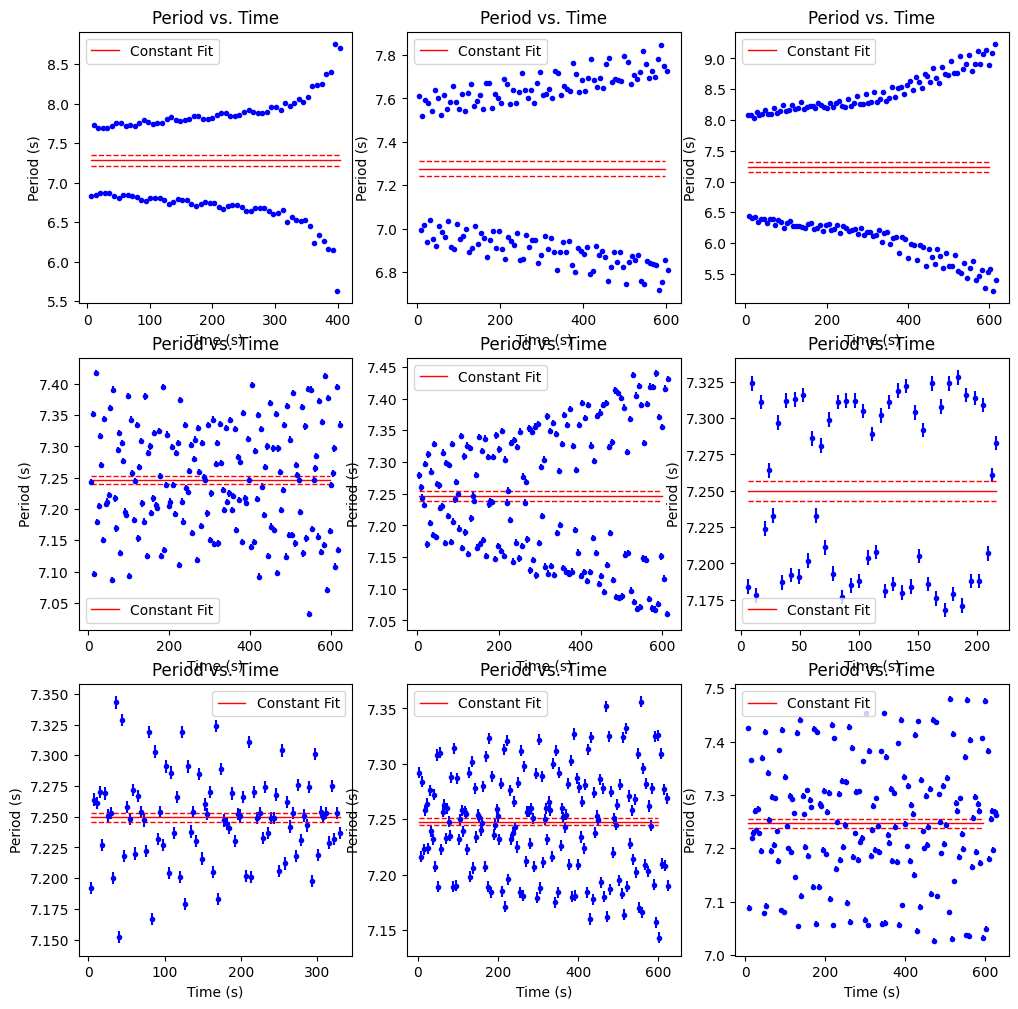

In [3]:
intercept1, dintercept1 = analyze_this("./group2_run1.csv",plot1)
intercept2, dintercept2 = analyze_this("./group2_run2.csv",plot2)
intercept3, dintercept3 = analyze_this("./group2_run3.csv",plot3)
intercept4, dintercept4 = analyze_this("./group2_run4.csv",plot4)
intercept5, dintercept5 = analyze_this("./group2_run5.csv",plot5)
intercept6, dintercept6 = analyze_this("./group2_run6.csv",plot6)
intercept7, dintercept7 = analyze_this("./group2_run7.csv",plot7)
intercept8, dintercept8 = analyze_this("./group2_run8.csv",plot8)
intercept9, dintercept9 = analyze_this("./group2_run9.csv",plot9)


figure

Constant Fit: Coefficients (from curve_fit)
[7.24810529]
Constant Fit: Covariance Matrix (from curve_fit)
[[2.17028854e-07]]

Constant Fit: Final Result: y = (7.24811 +/- 0.00047)



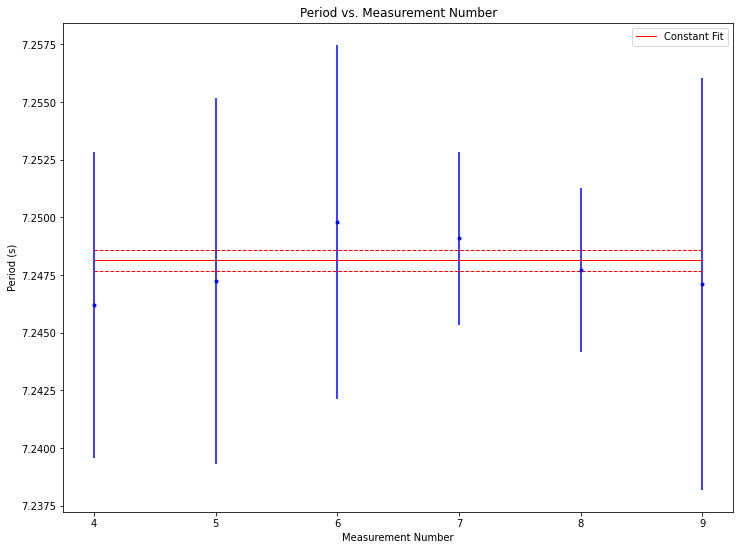

In [4]:
# x = np.array([1,2,3,4,5,6,7,8,9])
# dx = np.array([0.00001,0.00001,0.00001,0.00001,0.00001,.00001,.00001,.000001,.00001])
# y = np.array([intercept1,intercept2,intercept3,intercept4,intercept5,intercept6,intercept7,intercept8,intercept9])
# dy = np.array([dintercept1,dintercept2,dintercept3,dintercept4,dintercept5,dintercept6,dintercept7,dintercept8,dintercept9])

x = np.array([4,5,6,7,8,9])
dx = np.array([0.00001,0.00001,.00001,.00001,.000001,.00001])
y = np.array([intercept4,intercept5,intercept6,intercept7,intercept8,intercept9])
dy = np.array([dintercept4,dintercept5,dintercept6,dintercept7,dintercept8,dintercept9])

plt.rcParams["figure.figsize"] = (12,9)

figure2, axis2 = plt.subplots(1, 1)
plot10 = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)

plot10.errorbar(x,y,dy,dx,'b.')

plot10.set_ylabel('Period (s)')
plot10.set_xlabel('Measurement Number')
plot10.set_title('Period vs. Measurement Number')

# Takes the x and y values, with errors in y, and make a constant fit.  The last two parameters are
# the x_low and x_high range to fit over!  This first one is for the entire range.
intercept, dintercept = p201.constant_fit_plot_errors(x,y,dy,plot10)

# Adds the legend to the plot
plot10.legend()


In [5]:
def calc_l_eff(length, m_cable, m_weight, l_cable):
    l_eff = length * ((1+((1/3)*(m_cable/m_weight)*(l_cable**2/length**2)))/(1+((m_cable/m_weight)*(l_cable/(2*length)))))
    return l_eff


# length = 13.21308 (this one is old)
length = 13.1064 + 0.0254 - 0.03 # 43 feet and 1 inch minus 3cm for pivot correction
dlength = 0.003125
m_cable = 0.08930
dm_cable = 0.000005
m_weight = 2.291018
dm_weight = 0.000005
l_cm = 0.1792
dl_cm = 0.0005
l_cable = length - l_cm
dl_cable = l_cable * np.sqrt((dlength/length)**2+(dl_cm/l_cm))
l_eff = calc_l_eff(length, m_cable, m_weight, l_cable)
l_eff_low = calc_l_eff(length-dlength, m_cable-dm_cable, m_weight-dm_weight, l_cable-dl_cable)
l_eff_high = calc_l_eff(length+dlength, m_cable+dm_cable, m_weight+dm_weight, l_cable+dl_cable)

dl_eff = l_eff_high - l_eff_low
print(f"dl_eff = {l_eff_high:.4f} - {l_eff_low:.4f} = {dl_eff:.4f}")
print(f"l_eff = {l_eff:.4f} +/- {dl_eff:.4f}")

tfinal = intercept
dtfinal = dintercept

gfinal = 4.0*np.pi**2*l_eff/(tfinal**2)
dgfinal = gfinal*(dl_eff/l_eff + 2.0*dtfinal/tfinal)

print ("g = %.4f +/- %.4f" % (gfinal, dgfinal))
print("1 part in: ", int(gfinal / dgfinal))

dl_eff = 13.0249 - 13.0103 = 0.0146
l_eff = 13.0172 +/- 0.0146
g = 9.7820 +/- 0.0122
1 part in:  802


Constant Fit: Coefficients (from curve_fit)
[7.24620122]
Constant Fit: Covariance Matrix (from curve_fit)
[[inf]]

Constant Fit: Final Result: y = (7.24620 +/- inf)



/usr/local/lib64/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/local/lib/python3.6/site-packages/P201_Functions/P201_Functions.py:107: RuntimeWarning: covariance is not positive-semidefinite.
  ps = np.random.multivariate_normal(popt,pcov,100)


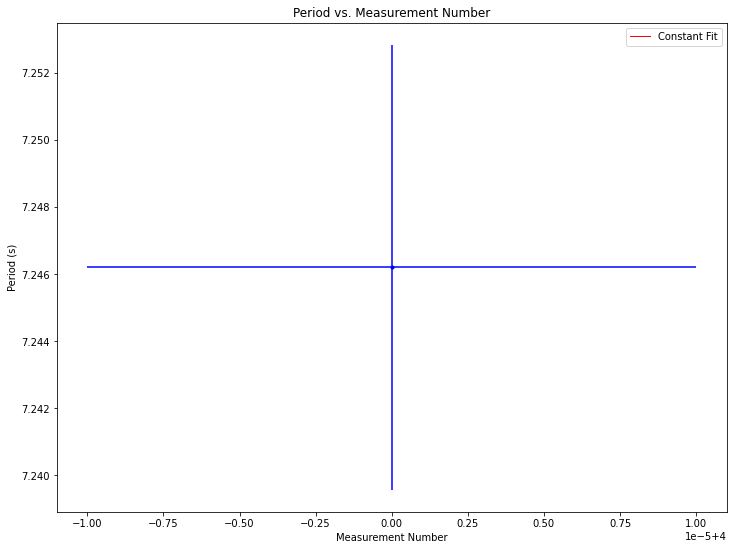

In [6]:
x = np.array([4])
dx = np.array([0.00001])
y = np.array([intercept4])
dy = np.array([dintercept4])

plt.rcParams["figure.figsize"] = (12,9)

figure2, axis2 = plt.subplots(1, 1)
plot6 = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)

plot6.errorbar(x,y,dy,dx,'b.')

plot6.set_ylabel('Period (s)')
plot6.set_xlabel('Measurement Number')
plot6.set_title('Period vs. Measurement Number')

# Takes the x and y values, with errors in y, and make a constant fit.  The last two parameters are
# the x_low and x_high range to fit over!  This first one is for the entire range.
intercept, dintercept = p201.constant_fit_plot_errors(x,y,dy,plot6)

# Adds the legend to the plot
plot6.legend()



In [7]:
length = 13.21308
dlength = .003125



tfinal = intercept
dtfinal = .003

gfinal = 4.0*np.pi**2*length/(tfinal**2)
dgfinal = gfinal*(dlength/length + 2.0*dtfinal/tfinal)

print ("g = %.4f +/- %.4f" % (gfinal,dgfinal))

g = 9.9344 +/- 0.0106
